In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [3]:
df = pd.read_csv('./data/mergeddata.csv')

In [4]:
df.drop(columns = ['Unnamed: 0', 'is_closed', 'coordinates', 'price', 'latitude', 'longitude', 'zip_code', 'url', 'transactions', 'location', 'display_phone'], inplace = True)

In [5]:
df.head()

,alias,categories,name,rating,review_count,permanently closed,outdoor_seating,price_cat,delivery,restaurant_reservation,pickup,total_restaurants_in_zip,Population Density,distance_to_subway
0,saggio-new-york-2,European,Saggio,4.0,617,0,0,two,1,0,1,131.0,100108.6,0.124657
1,bills-bar-and-burger-downtown-new-york,American (Casual),Bill's Bar & Burger Downtown,3.5,563,0,1,two,1,0,1,52.0,32132.0,0.075756
2,salt-charcoal-brooklyn,South Asian,Salt + Charcoal,4.0,517,0,1,two,1,1,1,208.0,NaN,0.434501
3,angkor-cambodian-bistro-new-york,American (Casual),Angkor Cambodian Bistro,4.5,285,1,0,two,0,0,0,182.0,82215.9,0.218862
4,khe-yo-new-york,South Asian,Khe-Yo,4.0,774,0,1,two,1,0,1,537.0,48772.7,0.085621


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 14 columns):
alias                       1365 non-null object
categories                  1365 non-null object
name                        1365 non-null object
rating                      1365 non-null float64
review_count                1365 non-null int64
permanently closed          1365 non-null int64
outdoor_seating             1365 non-null int64
price_cat                   1365 non-null object
delivery                    1365 non-null int64
restaurant_reservation      1365 non-null int64
pickup                      1365 non-null int64
total_restaurants_in_zip    1360 non-null float64
Population Density          1327 non-null float64
distance_to_subway          1365 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 149.4+ KB


In [7]:
df.dropna(inplace = True)

In [8]:
X = df.drop(columns = ['permanently closed', 'alias', 'name'])
y = df['permanently closed']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, stratify = y, random_state = 1)

In [10]:
X_train.shape

(928, 11)

In [11]:
X_test.shape

(399, 11)

In [12]:
y_train.value_counts()

0    799
1    129
Name: permanently closed, dtype: int64

In [13]:
y_test.value_counts()

0    343
1     56
Name: permanently closed, dtype: int64

In [14]:
price_dummies = pd.get_dummies(X_train.price_cat)
X_train.drop(columns = 'price_cat', inplace=True)

testprice_dummies = pd.get_dummies(X_test.price_cat)
X_test.drop(columns = 'price_cat', inplace= True)

In [15]:
cat_dummies = pd.get_dummies(X_train.categories)
X_train.drop(columns= 'categories', inplace = True)

testcat_dummies = pd.get_dummies(X_test.categories)
X_test.drop(columns= 'categories', inplace = True)

In [16]:
lr = LogisticRegression(random_state=1, class_weight= 'balanced', penalty='l2', C= 1, solver = 'liblinear')

lr.fit(pd.concat([X_train, price_dummies, cat_dummies], axis = 1), y_train)

train_pred = lr.predict(pd.concat([X_train, price_dummies, cat_dummies], axis = 1))
test_pred = lr.predict(pd.concat([X_test, testprice_dummies, testcat_dummies], axis = 1))

print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

print(metrics.precision_score(y_train, train_pred))
print(metrics.precision_score(y_test, test_pred))

print(metrics.recall_score(y_train, train_pred))
print(metrics.recall_score(y_test, test_pred))

0.8006465517241379
0.8120300751879699
0.40344827586206894
0.4144144144144144
0.9069767441860465
0.8214285714285714


In [18]:
print(metrics.confusion_matrix(y_train, train_pred))
print(metrics.confusion_matrix(y_test, test_pred))

[[626 173]
 [ 12 117]]
[[278  65]
 [ 10  46]]


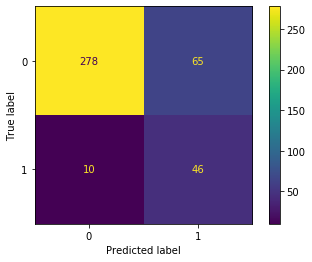

In [23]:
metrics.plot_confusion_matrix(lr, pd.concat([X_test, testprice_dummies, testcat_dummies], axis = 1), y_test)

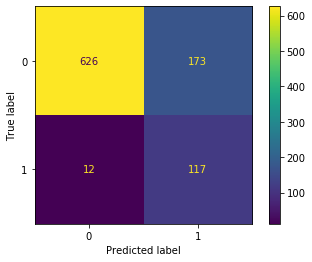

In [25]:
metrics.plot_confusion_matrix(lr, pd.concat([X_train, price_dummies, cat_dummies], axis = 1), y_train)

In [65]:
dtc = DecisionTreeClassifier(random_state=1, max_depth=4, max_features = 28, class_weight='balanced')

dtc.fit(pd.concat([X_train, price_dummies, cat_dummies], axis = 1), y_train)

dtc_trainpred = dtc.predict(pd.concat([X_train, price_dummies, cat_dummies], axis = 1))
dtc_testpred = dtc.predict(pd.concat([X_test, testprice_dummies, testcat_dummies], axis = 1))

print(metrics.accuracy_score(y_train, dtc_trainpred))
print(metrics.accuracy_score(y_test, dtc_testpred))

0.8631465517241379
0.8270676691729323


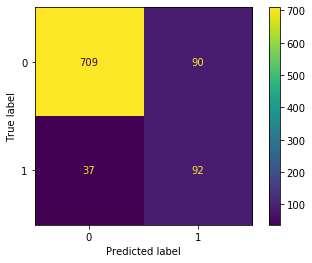

In [66]:
metrics.plot_confusion_matrix(dtc, pd.concat([X_train, price_dummies, cat_dummies], axis = 1), y_train)

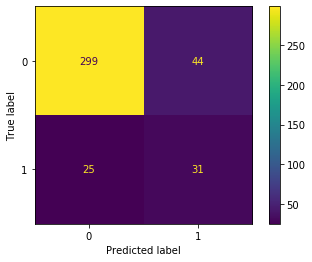

In [67]:
metrics.plot_confusion_matrix(dtc, pd.concat([X_test, testprice_dummies, testcat_dummies], axis = 1), y_test)